In [83]:
from pandas import Series, MultiIndex
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [2]:
__num_of_stocks = 54
__point_per_day = 50

read in data and parse the identifiers

In [101]:
f_df = pd.read_csv('data/first_round_train_fundamental_data.csv')
m_df = pd.read_csv('data/first_round_train_market_data.csv')
r_df = pd.read_csv('data/first_round_train_return_data.csv')

In [112]:
def parse_date_time_column(s: Series):
    return s.str.split(pat='s|d|p', expand=True).iloc[:, 1:].astype(int).rename(columns={1: 'asset', 2: 'day', 3: 'timeslot'})

In [102]:
def parse_date_column(s: Series):
    return s.str.split(pat='s|d', expand=True).iloc[:, 1:].astype(int).rename(columns={1: 'asset', 2: 'day'})

In [113]:
def pre_process_df_with_date_time(df):
    date_time_series = df['date_time']
    df.drop(columns='date_time', inplace=True)
    df.index = MultiIndex.from_frame(parse_date_time_column(date_time_series))

In [103]:
def pre_process_df_with_date(df):
    date_series = df['date_time']
    df.drop(columns='date_time', inplace=True)
    df.index = MultiIndex.from_frame(parse_date_column(date_series))

In [114]:
pre_process_df_with_date_time(m_df)

In [104]:
pre_process_df_with_date(r_df)
pre_process_df_with_date(f_df)

now we can build some features

In [115]:
m_agg_df = m_df.groupby(level=[0, 1]).mean().sort_index()
m_agg_df.head()

open      close       high        low      volume  \
asset day                                                           
0     1    24.550554  24.536720  24.578718  24.508076   454075.84   
      2    23.955800  23.938318  23.988574  23.907490   401517.02   
      3    23.626130  23.628554  23.661090  23.591664   307969.24   
      4    23.837576  23.847280  23.879820  23.803594   563240.50   
      5    25.965612  26.002992  26.075094  25.890594  2249971.94   

                  money  
asset day                
0     1    1.114925e+07  
      2    9.601600e+06  
      3    7.275962e+06  
      4    1.344701e+07  
      5    5.879807e+07

In [116]:
full_df = pd.concat([m_agg_df, f_df, r_df], axis=1).dropna()

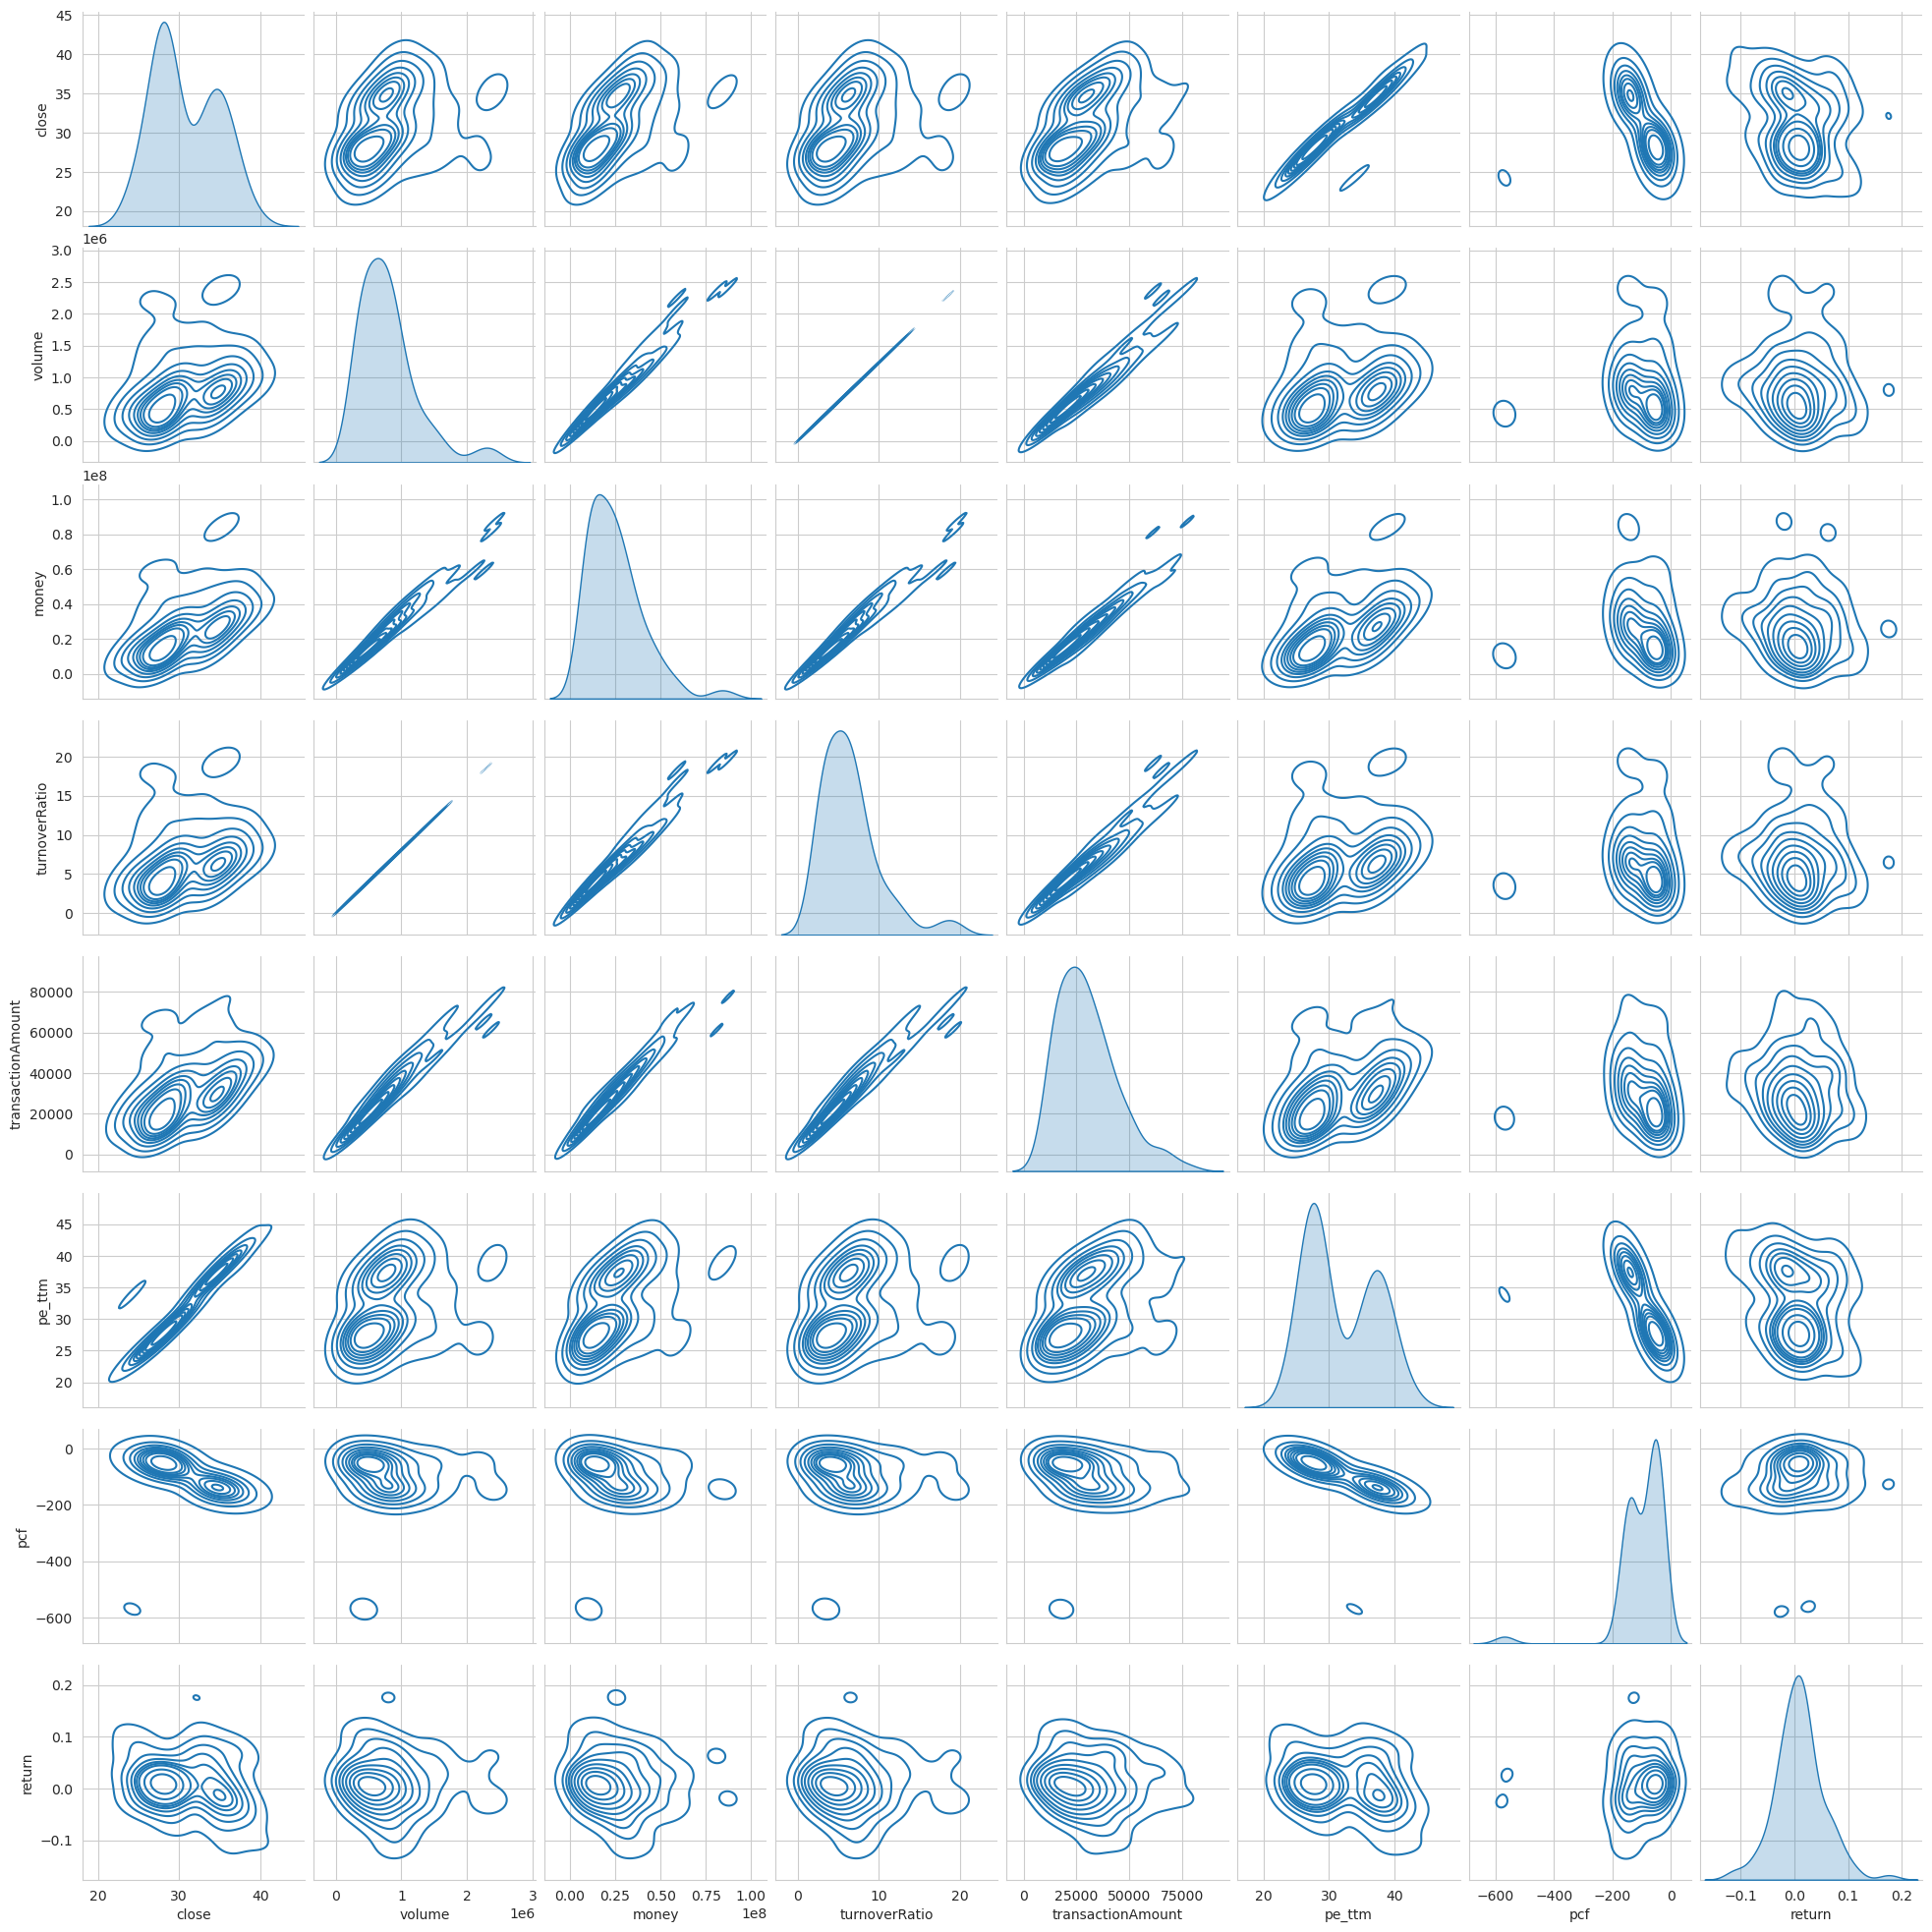

In [117]:
sns.pairplot(data=full_df[['close', 'volume', 'money', 'turnoverRatio', 'transactionAmount', 'pe_ttm', 'pcf', 'return']].iloc[:100], kind='kde')

In [118]:
X = full_df[['close', 'volume', 'money', 'turnoverRatio', 'transactionAmount', 'pe_ttm', 'pcf']]
y = full_df['return']

kf = KFold(n_splits=5, shuffle=True, random_state=10)
for train, test in kf.split(full_df.index):
    reg = LinearRegression().fit(X.iloc[train], y.iloc[train])
    train_score = reg.score(X.iloc[train], y.iloc[train])
    test_score = reg.score(X.iloc[test], y.iloc[test])
    print(f'train score: {train_score:.4f}, test score: {test_score:.4f}')

train score: 0.0037, test score: 0.0043
train score: 0.0043, test score: 0.0018
train score: 0.0036, test score: 0.0050
train score: 0.0044, test score: 0.0016
train score: 0.0038, test score: 0.0041
